# Import Library

In [ ]:
# prompt: import all library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


# Import Data

In [ ]:
gaming = pd.read_csv('/content/online_gaming_behavior_dataset.csv')
gaming.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


# Cleaning Data

In [ ]:
gaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [ ]:
gaming.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [ ]:
gaming.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [ ]:
gaming.duplicated().sum()

0

if data is clean, lets go analysis

# Data Analysis

In [ ]:
gaming

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


## Analisis Demografis

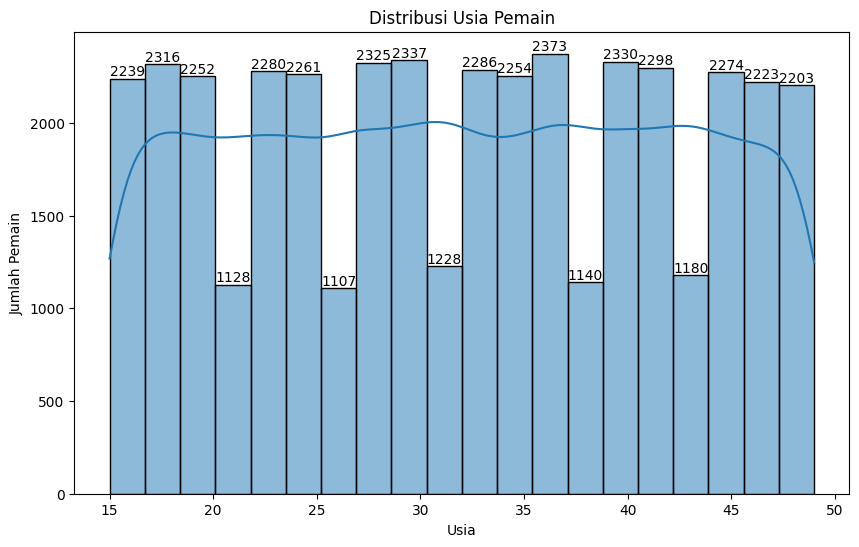

In [ ]:
# Distribusi usia pemain
plt.figure(figsize=(10, 6))

# Create histogram with KDE plot
hist = sns.histplot(gaming['Age'], bins=20, kde=True)

# Add annotations
for patch in hist.patches:
    height = patch.get_height()
    width = patch.get_width()
    bin_center = patch.get_x() + width / 2
    count = int(height)
    plt.text(bin_center, height, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Usia Pemain')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pemain')
plt.show()

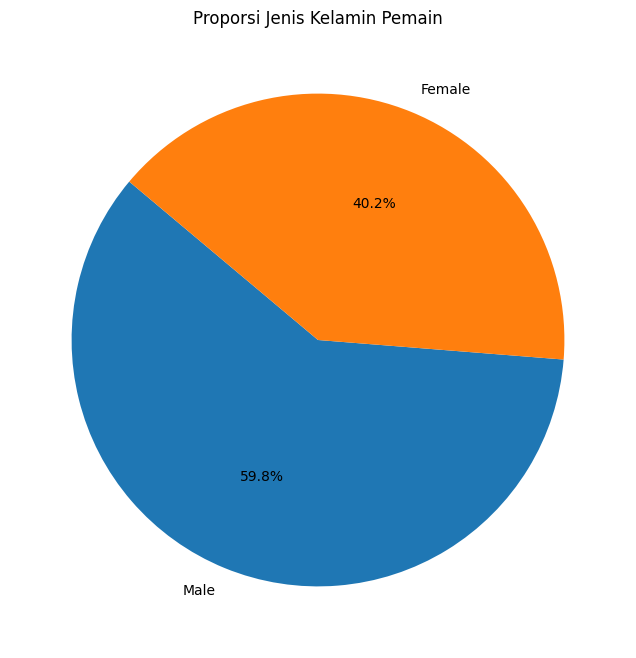

In [ ]:
# Proporsi jenis kelamin pemain

gender_counts = gaming['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Jenis Kelamin Pemain')
plt.show()

## Analisis Genre Game

<ipython-input-10-29a56c054a74>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(x='GameGenre', data=gaming, palette='Set2')


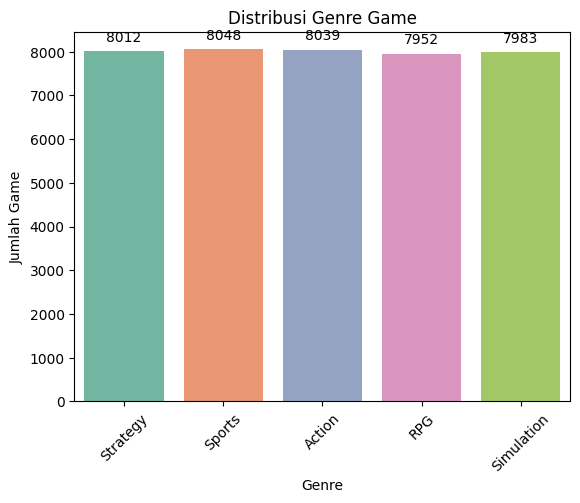

In [ ]:
# Genre game yang paling populer

# Create the count plot with different colors
count_plot = sns.countplot(x='GameGenre', data=gaming, palette='Set2')

# Add total counts on top of each bar
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 10),
                        textcoords='offset points')

plt.title('Distribusi Genre Game')
plt.xlabel('Genre')
plt.ylabel('Jumlah Game')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check if 'gaming' exists and print its columns
if 'gaming' in locals():
    print(gaming.columns)
else:
    print("The variable 'gaming' does not exist.")

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')


<ipython-input-12-6533ffe26195>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='PlayTimeHours', y='GameGenre', data=genre_playtime, palette='viridis')


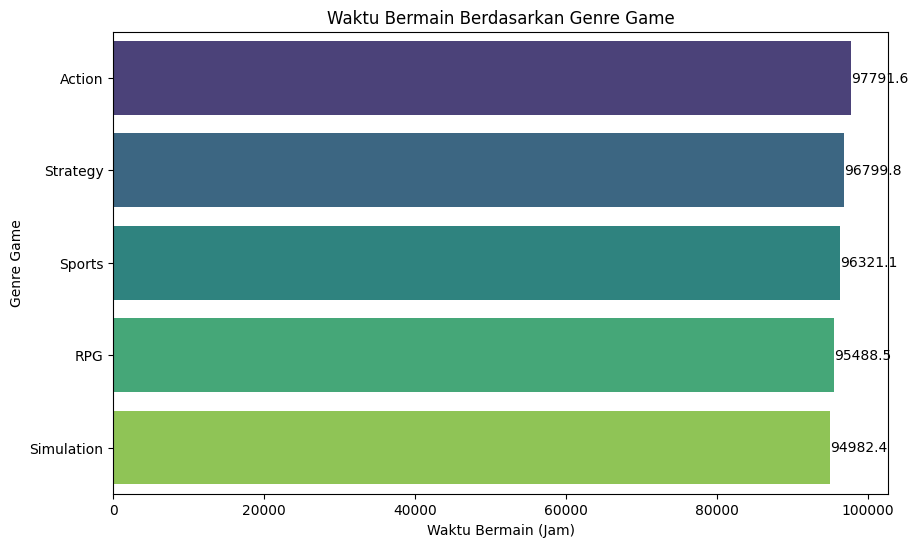

In [ ]:
# Genre game dengan waktu bermain terbanyak

genre_playtime = gaming.groupby('GameGenre')['PlayTimeHours'].sum().reset_index()
genre_playtime = genre_playtime.sort_values('PlayTimeHours', ascending=False)

# Membuat plot batang
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='PlayTimeHours', y='GameGenre', data=genre_playtime, palette='viridis')

# Menambahkan angka waktu bermain di atas setiap bar
for index, value in enumerate(genre_playtime['PlayTimeHours']):
    plot.text(value, index, f'{value:.1f}', ha='left', va='center', fontsize=10)

plt.title('Waktu Bermain Berdasarkan Genre Game')
plt.xlabel('Waktu Bermain (Jam)')
plt.ylabel('Genre Game')
plt.show()

## Analisis Pembelian Dalam Game:


In [ ]:
# Total pembelian dalam game oleh pemain
total_purchases = gaming['InGamePurchases'].sum()
print("Total Pembelian:", total_purchases)

Total Pembelian: 8041


<ipython-input-14-32916946ff33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='InGamePurchases', y='GameGenre', data=genre_purchasing, palette='viridis')


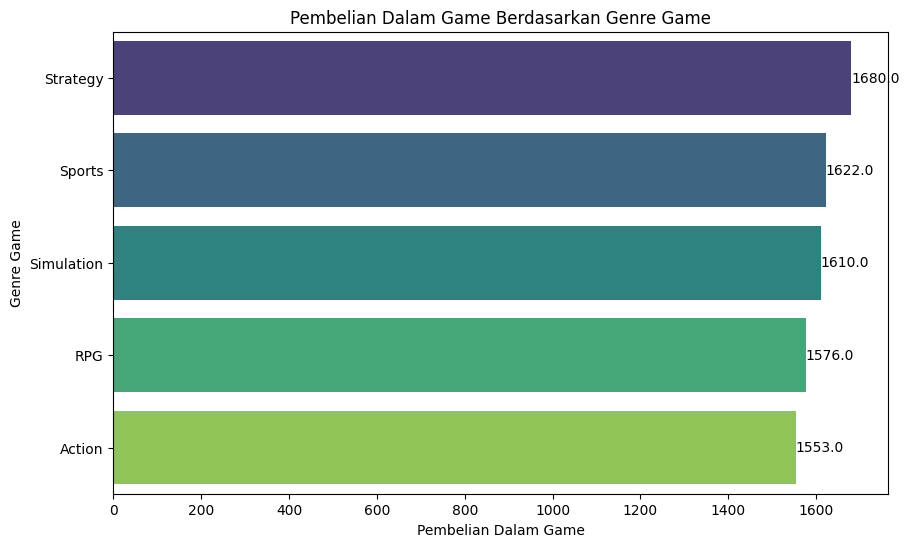

In [ ]:
# Pembelian dalam game berdasarkan genre game
genre_purchasing = gaming.groupby('GameGenre')['InGamePurchases'].sum().reset_index()
genre_purchasing = genre_purchasing.sort_values('InGamePurchases', ascending=False)

plt.figure(figsize=(10, 6))
plot = sns.barplot(x='InGamePurchases', y='GameGenre', data=genre_purchasing, palette='viridis')

# Menambahkan angka waktu bermain di atas setiap bar
for index, value in enumerate(genre_purchasing['InGamePurchases']):
    plt.text(value, index, f'{value:.1f}', ha='left', va='center', fontsize=10)

plt.title('Pembelian Dalam Game Berdasarkan Genre Game')
plt.xlabel('Pembelian Dalam Game')
plt.ylabel('Genre Game')
plt.show()

## Analisis Tingkat Kesulitan:


In [ ]:
print(gaming.columns)

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')


<ipython-input-16-d8948a05d3bd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GameDifficulty', data=gaming, palette='viridis', order=ordered_categories)


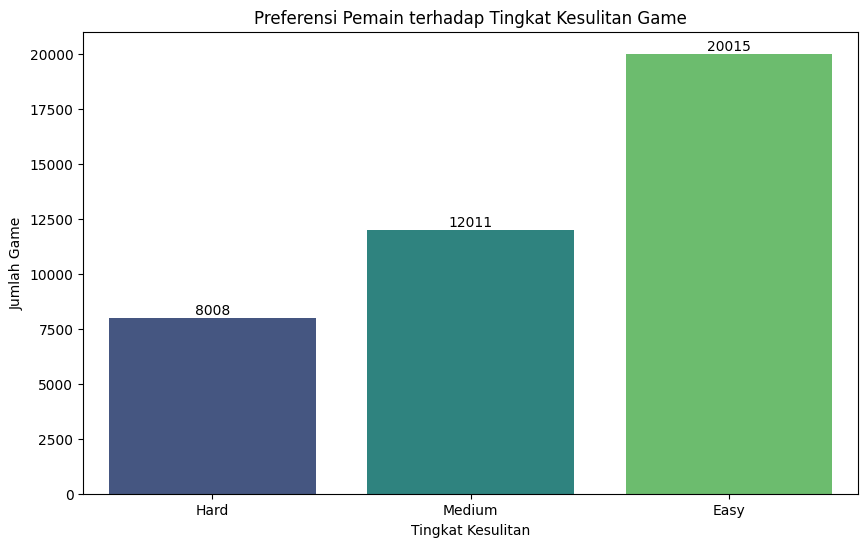

In [ ]:
# Preferensi pemain terhadap tingkat kesulitan game
counts = gaming['GameDifficulty'].value_counts().sort_values(ascending=True)

# Reorder the 'GameDifficulty' column based on sorted counts
ordered_categories = counts.index
gaming['GameDifficulty'] = pd.Categorical(gaming['GameDifficulty'], categories=ordered_categories, ordered=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='GameDifficulty', data=gaming, palette='viridis', order=ordered_categories)

plt.title('Preferensi Pemain terhadap Tingkat Kesulitan Game')
plt.xlabel('Tingkat Kesulitan')
plt.ylabel('Jumlah Game')

# Add annotations
for index, count in enumerate(counts):
    plt.text(index, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

## Analisis Frekuensi dan Durasi Sesi Bermain:


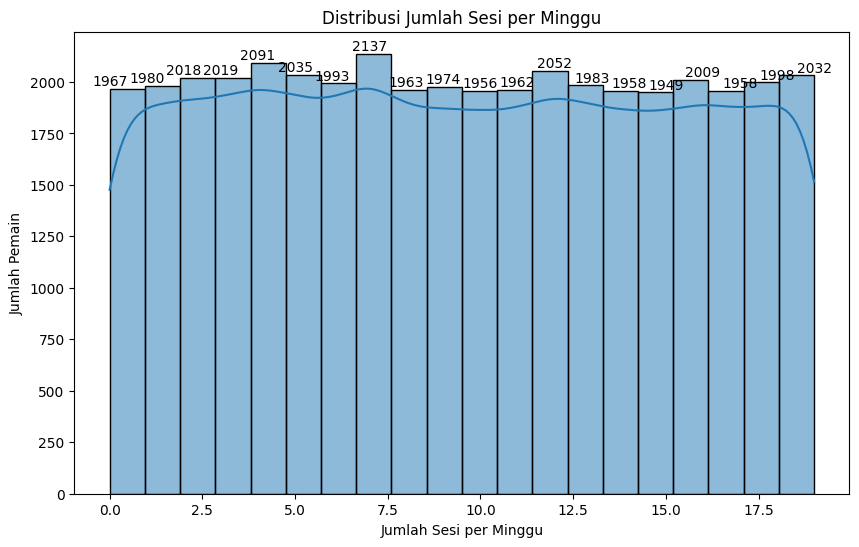

In [ ]:
# Distribusi jumlah sesi per minggu
plt.figure(figsize=(10, 6))
sns.histplot(gaming['SessionsPerWeek'], bins=20, kde=True)
plt.title('Distribusi Jumlah Sesi per Minggu')
plt.xlabel('Jumlah Sesi per Minggu')
plt.ylabel('Jumlah Pemain')

counts = gaming['SessionsPerWeek'].value_counts().sort_index()
for index, value in counts.items():
    plt.text(index, value + 2, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

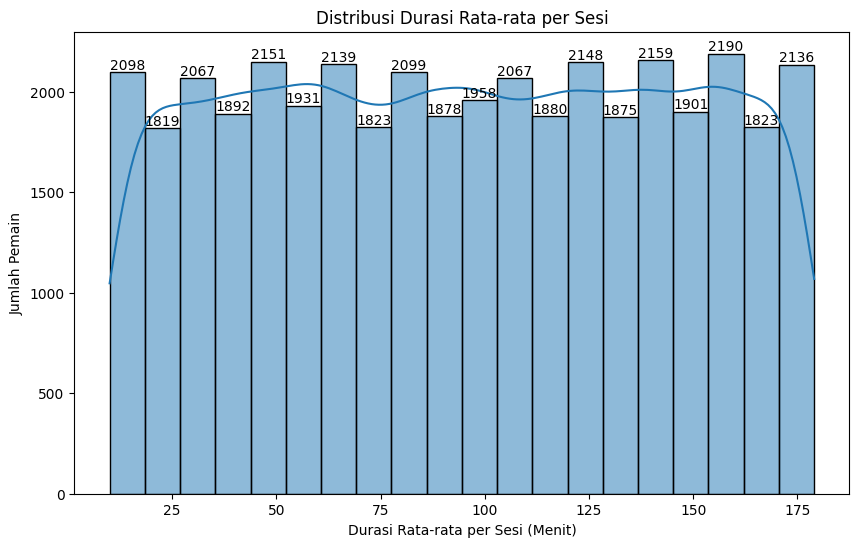

In [ ]:
# Distribusi durasi rata-rata per sesi
# Assuming 'gaming' is your DataFrame
plt.figure(figsize=(10, 6))

# Create histogram with KDE plot
hist = sns.histplot(gaming['AvgSessionDurationMinutes'], bins=20, kde=True)

# Add annotations
for patch in hist.patches:
    height = patch.get_height()
    width = patch.get_width()
    bin_center = patch.get_x() + width / 2
    count = int(height)
    if count > 0:  # Only add text for non-zero counts
        plt.text(bin_center, height, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Durasi Rata-rata per Sesi')
plt.xlabel('Durasi Rata-rata per Sesi (Menit)')
plt.ylabel('Jumlah Pemain')
plt.show()

## Analisis Tingkat Pemain dan Pencapaian

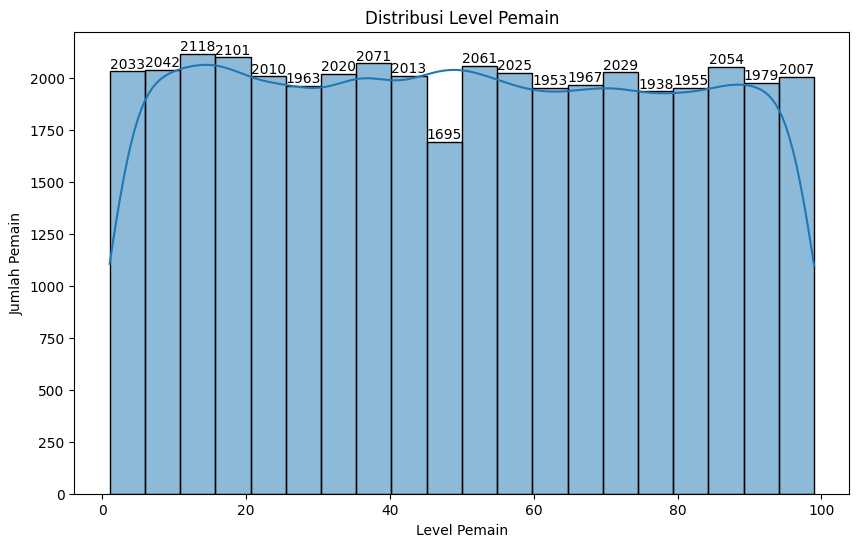

In [ ]:
# Assuming 'gaming' is your DataFrame
plt.figure(figsize=(10, 6))

# Create histogram with KDE plot
hist = sns.histplot(gaming['PlayerLevel'], bins=20, kde=True)

# Add annotations
bin_edges = hist.patches[0].get_path().vertices[:, 0]
bin_width = bin_edges[1] - bin_edges[0]
for patch in hist.patches:
    height = patch.get_height()
    width = patch.get_width()
    bin_center = patch.get_x() + width / 2
    count = int(height)
    plt.text(bin_center, height + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Level Pemain')
plt.xlabel('Level Pemain')
plt.ylabel('Jumlah Pemain')
plt.show()

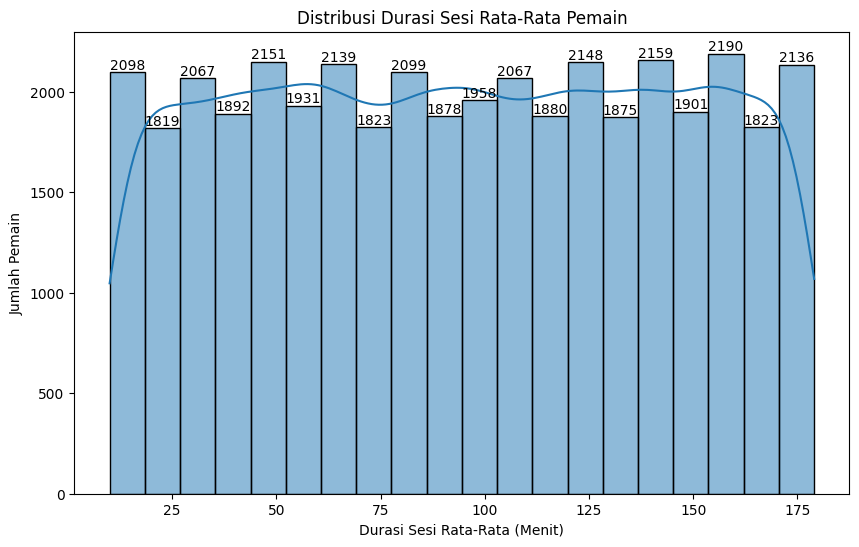

In [ ]:
# Assuming 'gaming' is your DataFrame
plt.figure(figsize=(10, 6))

# Create histogram with KDE plot
hist = sns.histplot(gaming['AvgSessionDurationMinutes'], bins=20, kde=True)

# Add annotations
for patch in hist.patches:
    height = patch.get_height()
    width = patch.get_width()
    bin_center = patch.get_x() + width / 2
    count = int(height)
    plt.text(bin_center, height, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Durasi Sesi Rata-Rata Pemain')
plt.xlabel('Durasi Sesi Rata-Rata (Menit)')
plt.ylabel('Jumlah Pemain')
plt.show()

## Analisis Tingkat Pemain dan Pencapaian

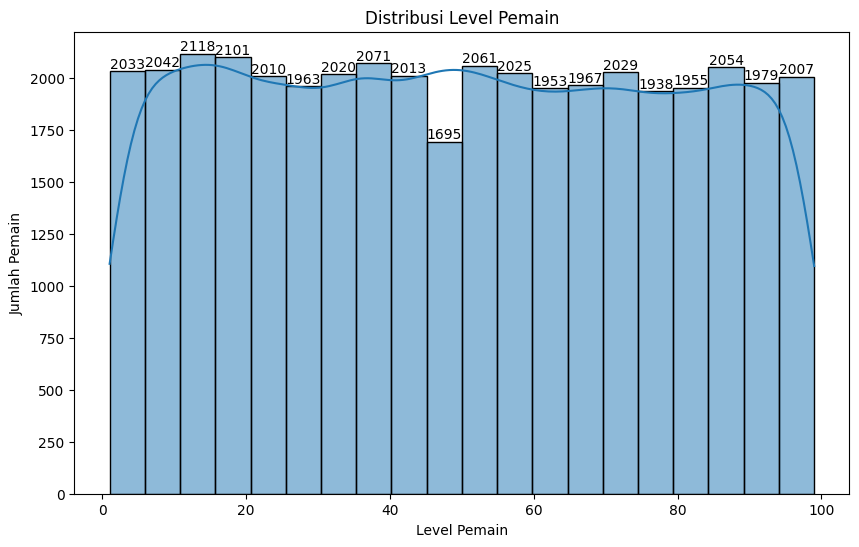

In [ ]:
# Distribusi level pemain
# Assuming 'gaming' is your DataFrame
plt.figure(figsize=(10, 6))

# Create histogram with KDE plot
hist = sns.histplot(gaming['PlayerLevel'], bins=20, kde=True)

# Add annotations
for patch in hist.patches:
    height = patch.get_height()
    width = patch.get_width()
    bin_center = patch.get_x() + width / 2
    count = int(height)
    plt.text(bin_center, height, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Level Pemain')
plt.xlabel('Level Pemain')
plt.ylabel('Jumlah Pemain')
plt.show()

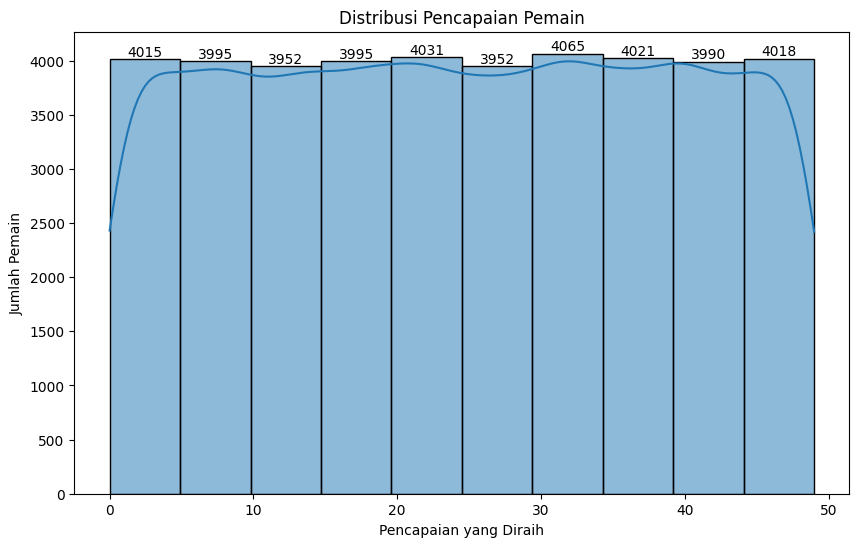

In [ ]:
# Distribusi pencapaian yang diraih oleh pemain
plt.figure(figsize=(10, 6))

# Create histogram with KDE plot
hist = sns.histplot(gaming['AchievementsUnlocked'], bins=10, kde=True)

# Add annotations
for patch in hist.patches:
    height = patch.get_height()
    width = patch.get_width()
    bin_center = patch.get_x() + width / 2
    count = int(height)
    if count > 0:  # Only add text for non-zero counts
        plt.text(bin_center, height, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Distribusi Pencapaian Pemain')
plt.xlabel('Pencapaian yang Diraih')
plt.ylabel('Jumlah Pemain')
plt.show()

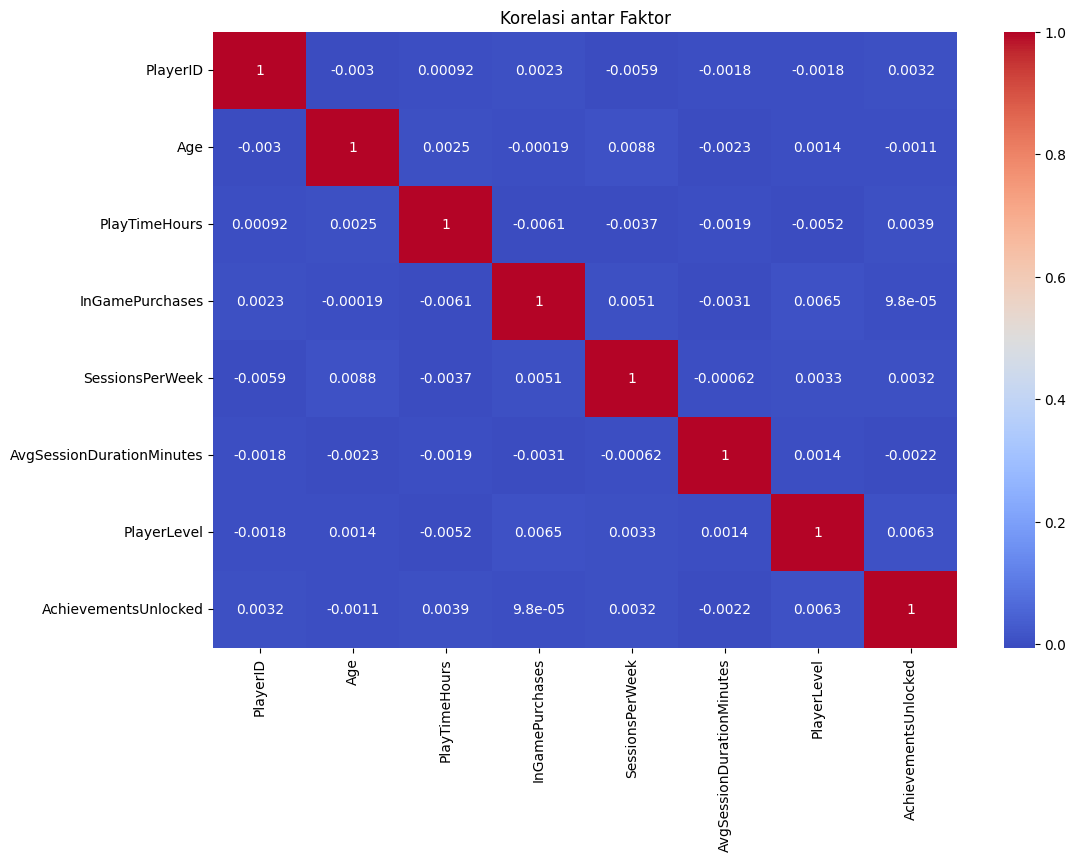

In [ ]:
# Faktor-faktor yang mempengaruhi tingkat keterlibatan
# Select only numerical columns for correlation calculation
numerical_gaming = gaming.select_dtypes(include=['number'])
correlation_matrix = numerical_gaming.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Faktor')
plt.show()

In [ ]:
nation_player = gaming.groupby('Location')['PlayerID'].sum().reset_index()
nation_player

,Location,PlayerID
0,Asia,235285746
1,Europe,348529652
2,Other,114209050
3,USA,463622113


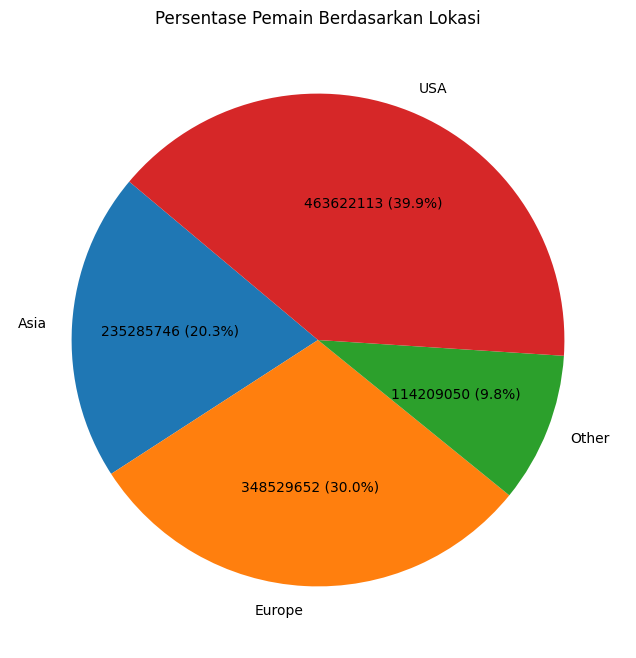

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'nation_player' is your DataFrame containing 'PlayerID' and 'Location'

plt.figure(figsize=(8, 8))

# Create pie chart
patches, texts, autotexts = plt.pie(nation_player['PlayerID'], labels=nation_player['Location'], autopct='%1.1f%%', startangle=140)

# Add labels with numbers
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    percentage = nation_player['PlayerID'].iloc[i]
    autotext.set_text(f'{percentage} ({autotext.get_text()})')

plt.title('Persentase Pemain Berdasarkan Lokasi')
plt.show()


In [ ]:
gaming = pd.DataFrame(gaming)

# Simpan DataFrame ke CSV
gaming.to_csv('Gaming Fix.csv', index=False)